# Build and Evaluate a Regression Model

## Define the Task

The task is:

Make predictions about a country's life expectancy in years from a set of metrics for the country


## Import the Necessary Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

## clean data

In [2]:
# Load the data
dataset = pd.read_csv("world_data.csv")

In [3]:
# Examine the date shape
dataset.shape

(194, 17)

In [4]:
# Inspect first few rows
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [5]:
# Check data types
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [6]:
# Check for nulls
dataset.isnull().mean().sort_values()

country            0.000000
sanitation         0.000000
water              0.000000
population         0.000000
childmortality     0.005155
income             0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

In [7]:
# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Impute all features with mean
means = dataset.mean(numeric_only=True).to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

In [8]:
dataset.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## understand data

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [10]:
plt.style.use('bmh') #Bayesian Methods for Hackers

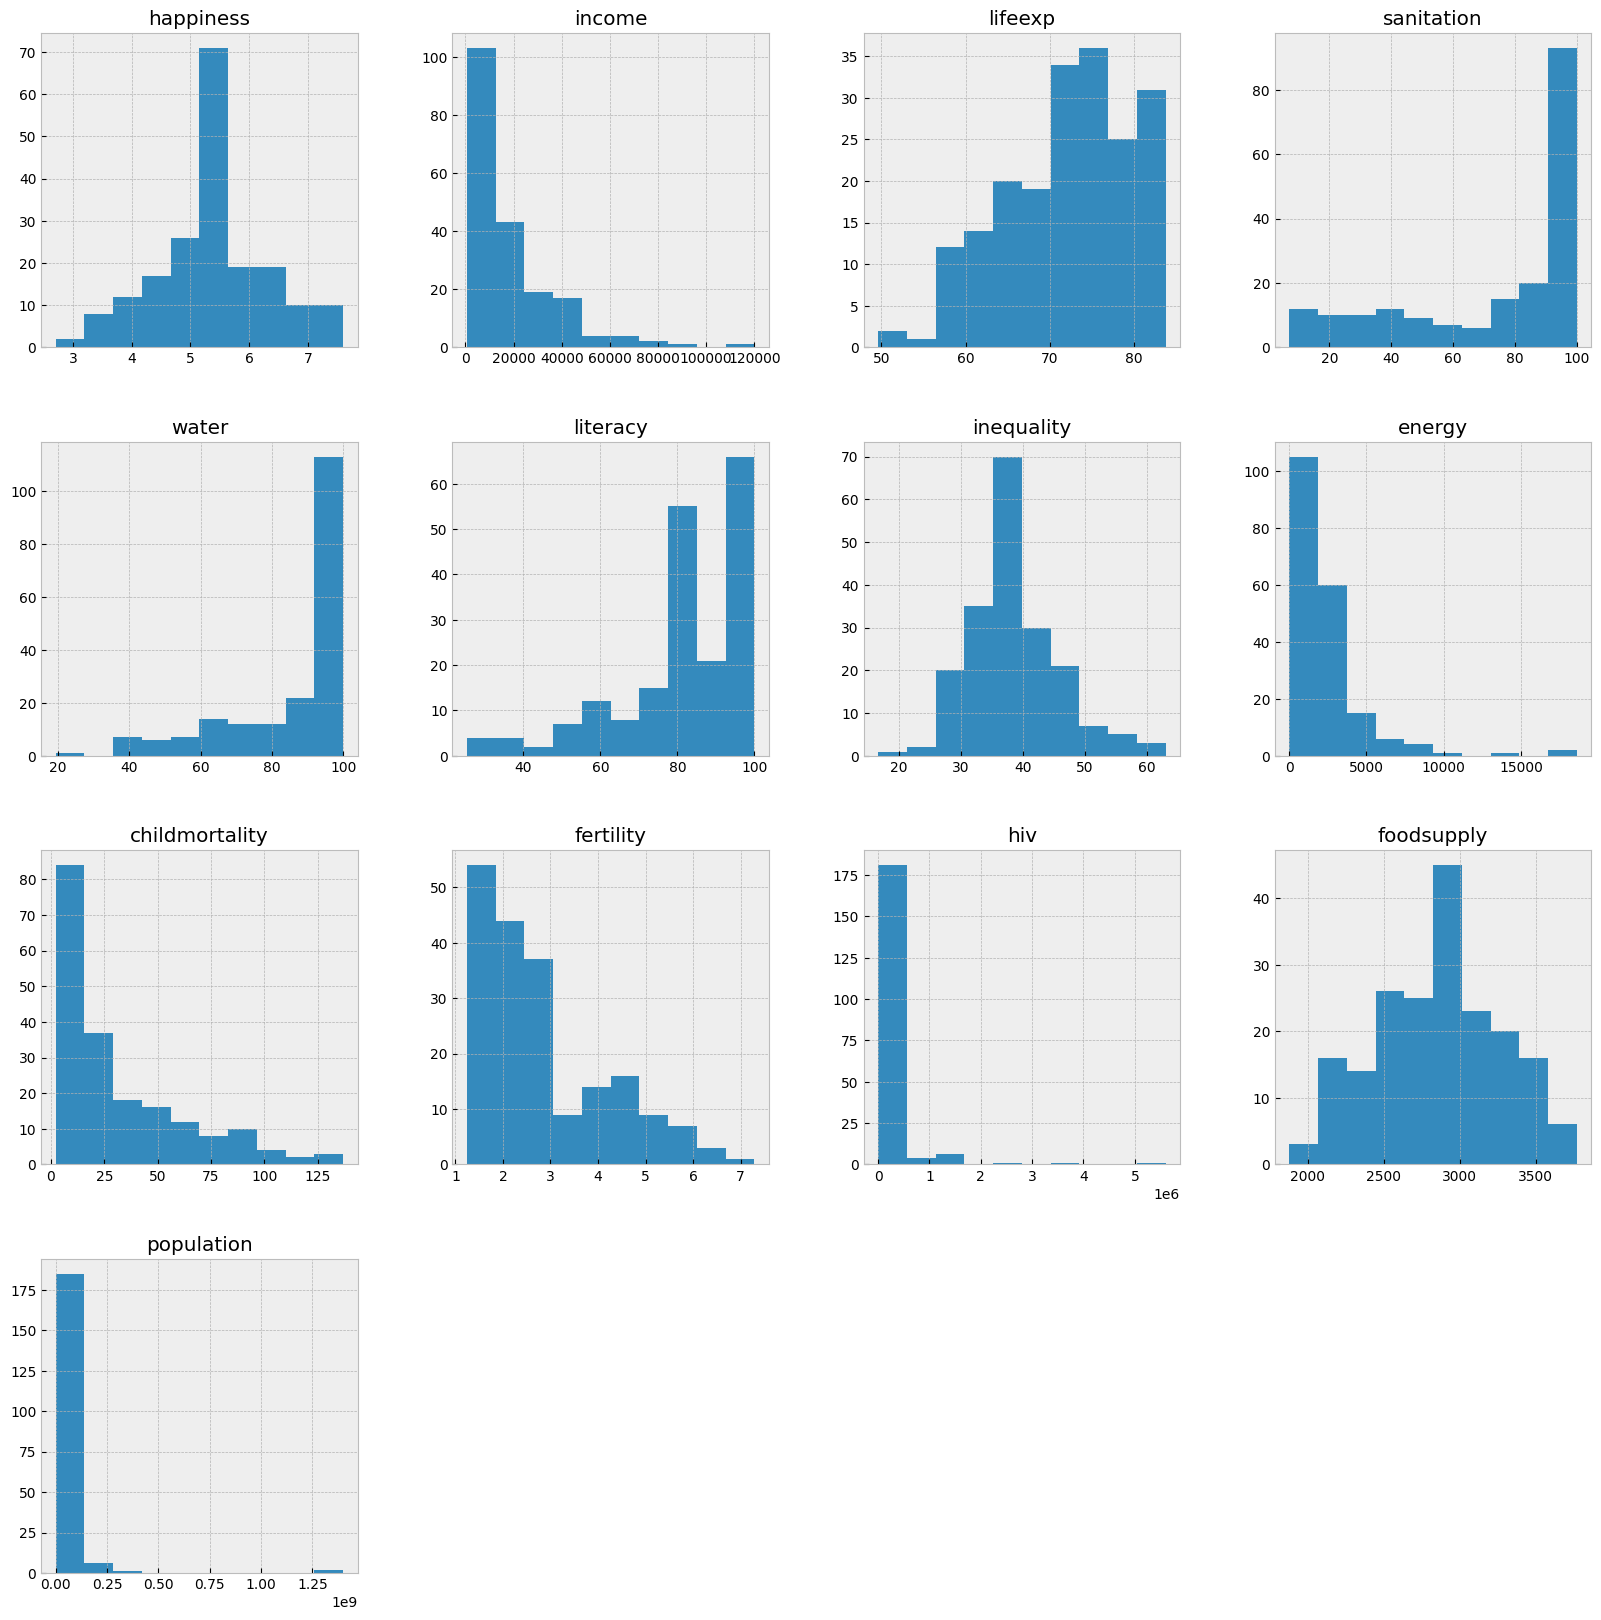

In [11]:
dataset.hist(figsize=(20,20))
plt.show()

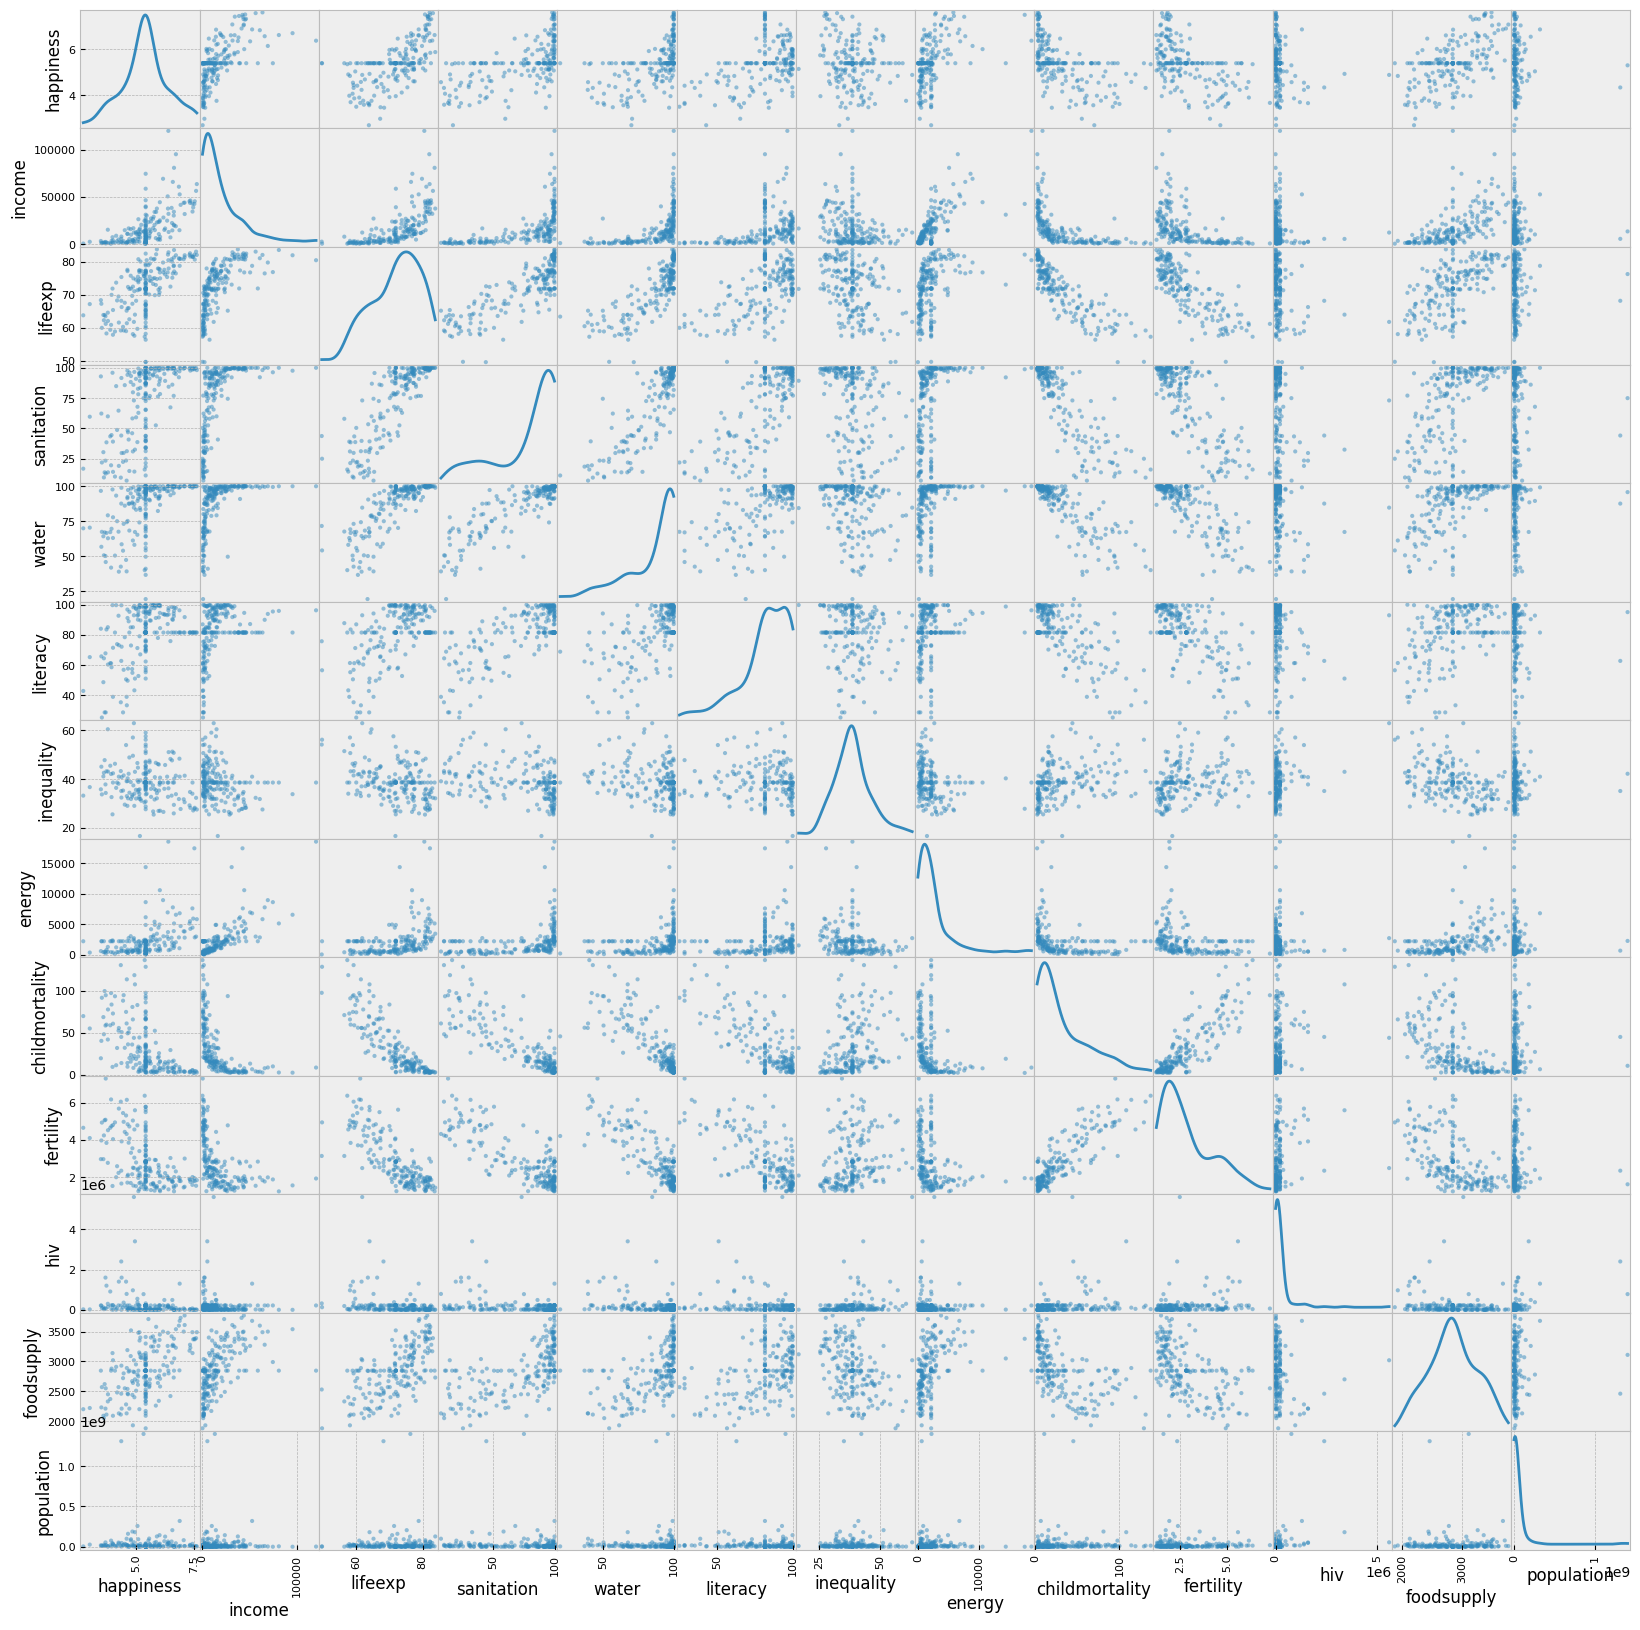

In [8]:
scatterMatrix(dataset)

## prepare data

In [12]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

In [13]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [14]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Build model

In [15]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

In [16]:
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

LinearRegression 2.292003592509176
KNeighborsRegressor 2.1955055341375447
SVR 2.5427645613630157


# evaluation

In [17]:
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

LinearRegression 2.446395650811029
KNeighborsRegressor 2.5532340600575916
SVR 2.6412058180288183


In [18]:
model = models[2]

In [19]:
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Prediction,Actual,Error
44,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,64.122909,65.40000,1.277091
172,0.549625,0.097816,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07,72.167513,71.93369,-0.233824
163,0.549625,0.010446,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05,66.064522,61.60000,-4.464522
35,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,74.594477,71.90000,-2.694477
136,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.858212,74.30000,1.441788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.549625,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.038917,0.511086,6.785768e-05,73.333089,70.30000,-3.033089
18,0.350346,0.007765,0.165949,0.428748,0.045515,0.403017,0.116950,0.640208,0.694215,0.021418,0.444444,1.292082e-02,63.085429,60.30000,-2.785429
159,0.549625,0.101167,0.766466,0.945477,0.753331,0.473693,0.041549,0.100890,0.147107,0.038917,0.301587,6.857197e-05,73.285264,71.40000,-1.885264
113,0.445901,0.098654,0.710504,0.810409,0.906292,1.000000,0.144721,0.310831,0.206612,1.000000,0.603175,3.949245e-02,69.807833,61.80000,-8.007833


# inspect models

In [21]:
models[0].coef_

array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

In [22]:
models[0].intercept_

np.float64(69.60409836404614)

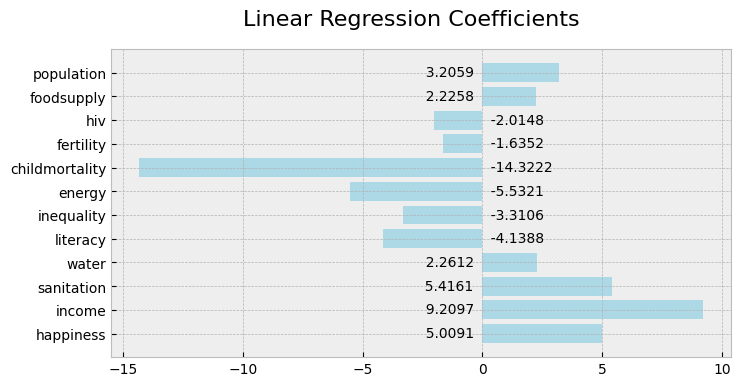

In [23]:
linearRegressionSummary(models[0], X.columns)
# the max income ($120,000), and min income ($623), which is $119,377. If you do the math (119377/9.2097), you can see that this model predicts that each $12,962 increase in average income, increases life expectancy by one year.

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
rescaledX = scaler.fit_transform(X)

In [26]:
models[1].kneighbors(X)

(array([[0.        , 0.38911668, 0.3929857 , 0.4201251 , 0.51618381],
        [0.        , 0.20505552, 0.20891422, 0.23226123, 0.26827204],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.16349608, 0.20891422, 0.22826679, 0.28847733],
        [0.13327753, 0.15176936, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.3593436 , 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.31469369, 0.32420127, 0.35698837, 0.41441586],
        [0.        , 0.1962574 , 0.34952635, 0.44393928, 0.51551159],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.50647823, 0.51036495, 0.51934624, 0.53394104, 0.5422487 ],
        [0.        , 0.28806232, 0.34952635, 0.46122169, 0.46576997],
        [0.        , 0.31134313, 0.31241819, 0.3828958 , 0.39244964],
        [0.15281102,

In [27]:
g = models[1].kneighbors_graph(X).toarray()

In [28]:
g[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])